In [158]:
import pandas as pd

pop_df=pd.read_csv('data/population.csv')
reason_df = pd.read_excel('data/집밖_활동시_불편_이유_20220602155434.xlsx')
help_df = pd.read_excel('data/일상생활_도움_필요_정도_20220602155421.xlsx')


,장애유형별(1),2017,2017.1,2017.2,2017.3,2017.4
0,장애유형별(1),장애인관련 편의시설 부족,외출시 동반자가 없어서,주위 사람들의 시선때문에,의사소통의 어려움이 있어서,기타
1,전체,49.7,26.9,10.6,11,1.7
2,지체장애,68.3,19.4,9.4,0.4,2.4
3,뇌병변장애,51.9,31.3,12.3,4.6,-
4,시각장애,49.8,36.8,8.1,3.2,2
5,청각장애,21,20.2,3.4,53.7,1.7
6,언어장애,13.8,26,11.1,49,-
7,지적장애,3,48.6,14.5,33.1,0.8
8,자폐성장애,7,44.6,23,25.5,-
9,정신장애,12.1,39.2,35.9,12.8,-


/Users/seungheejeong/opt/anaconda3/envs/pydatavenv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [196]:
reason_index=reason_df.loc[0]
reason_index[0] = 'type'
reason_df.columns=reason_index
reason_condi = (reason_df.type == '시각장애')
reason_df2 = reason_df.loc[condi]
reason_df2 


,type,장애인관련 편의시설 부족,외출시 동반자가 없어서,주위 사람들의 시선때문에,의사소통의 어려움이 있어서,기타
2,지체장애,68.3,19.4,9.4,0.4,2.4


['지체장애', 68.3, 19.4, 9.4, 0.4, 2.4]
[2]


ValueError: could not convert string to float: '지체장애'

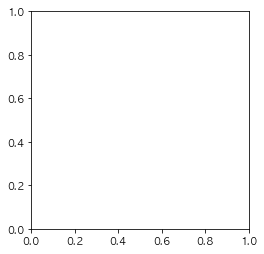

In [188]:
#레이더차트
import matplotlib.pyplot as plt

ratio = reason_df2.iloc[0].to_list()
print(ratio)
labels = reason_df2.index.to_list()
print(labels)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [139]:
#지역별 시각장애인 인구
pop_df2=pop_df.iloc[2:,0:4]

pop_df2=pop_df2.fillna({'장애유형별(1)':'청각ㆍ언어'})
pop_df2.reset_index(drop=True,inplace=True)

for idx in pop_df2['시도별(1)'].index:
    # print(pop_df2['시도별(1)'][idx])
    if str(pop_df2['시도별(1)'][idx]) != 'nan':
        region = pop_df2['시도별(1)'][idx]
        # print(region)
    else:
        pop_df2.at[idx,'시도별(1)']= region

index_name = ['city','type','type2','population']
pop_df2.columns=index_name
condi = (pop_df2.type=='시각')

blind_pop = pop_df2.loc[condi,['city','population']]
                        
for pop in blind_pop['population'].index:
    blind_pop.at[pop,'population'] = blind_pop['population'][pop].replace(",","")

blind_pop['population_int']=pd.to_numeric(blind_pop['population'])
blind_pop=blind_pop.set_index('city')
blind_pop2=blind_pop.sort_values(by='population_int',ascending=False)
blind_pop2


,population,population_int
city,,
전국,252957,252957
경기도,52988,52988
서울특별시,41900,41900
부산광역시,18134,18134
경상남도,17054,17054
경상북도,16234,16234
전라남도,14078,14078
인천광역시,13756,13756
대구광역시,12067,12067


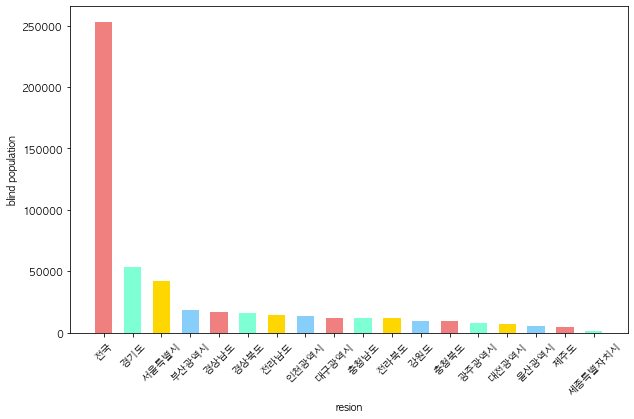

In [157]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

xs=blind_pop2.index.to_list()
ys=blind_pop2['population_int'].to_list()
plt.figure(figsize=(10, 6))			#그래프 크기 지정
plt.xlabel('resion')				#그래프 x축 이름(label) 지정
plt.ylabel('blind population')				#그래프 y축 이름(label) 지정

colors = ['lightcoral','aquamarine', 'gold', 'lightskyblue']
plt.bar(xs, ys, width=0.6, color=colors )	#리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯 
plt.xticks(rotation=45)

# plt.show()
plt.savefig('blind_population.png',dpi=300)

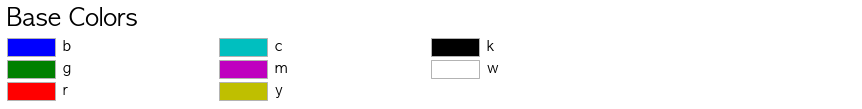

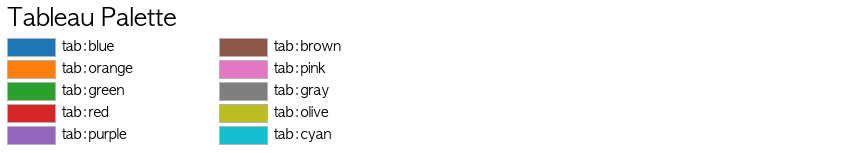

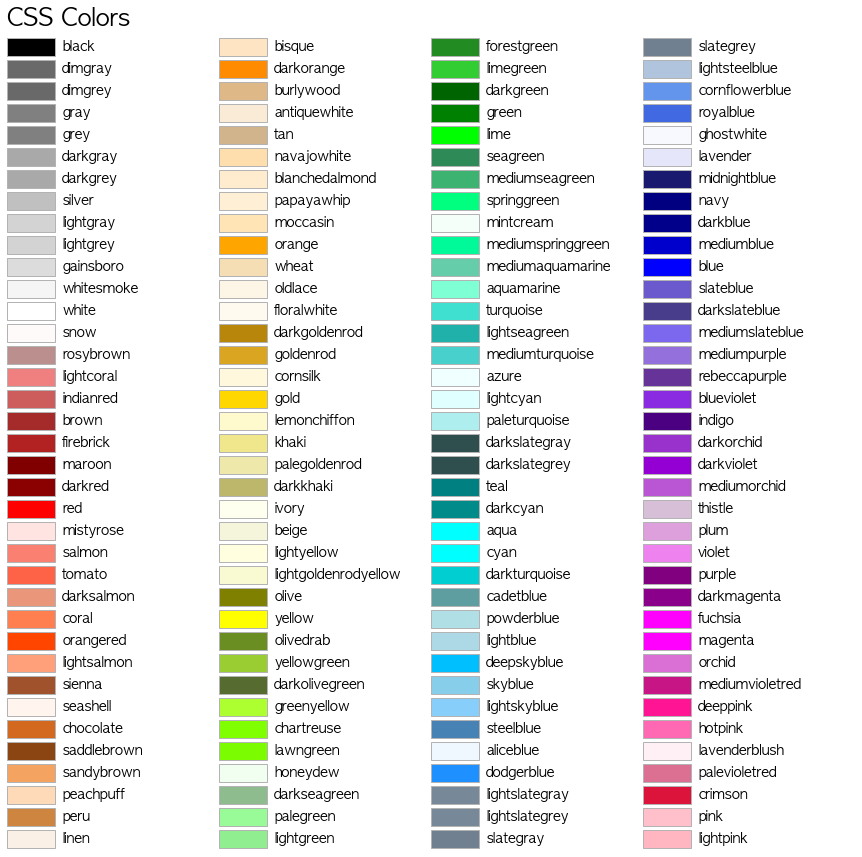

In [147]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

In [159]:
display(reason_df)
reason_df.

,장애유형별(1),2017,2017.1,2017.2,2017.3,2017.4
0,장애유형별(1),장애인관련 편의시설 부족,외출시 동반자가 없어서,주위 사람들의 시선때문에,의사소통의 어려움이 있어서,기타
1,전체,49.7,26.9,10.6,11,1.7
2,지체장애,68.3,19.4,9.4,0.4,2.4
3,뇌병변장애,51.9,31.3,12.3,4.6,-
4,시각장애,49.8,36.8,8.1,3.2,2
5,청각장애,21,20.2,3.4,53.7,1.7
6,언어장애,13.8,26,11.1,49,-
7,지적장애,3,48.6,14.5,33.1,0.8
8,자폐성장애,7,44.6,23,25.5,-
9,정신장애,12.1,39.2,35.9,12.8,-
